In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('../src/data/marketing_campaign_cleaned.csv', index_col=[0])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,1,83894400000000000,64,1617,Alone,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,10800000000000000,67,27,Alone,2,3,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,40780800000000000,56,776,Partner,0,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,5616000000000000,37,53,Partner,1,3,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,27734400000000000,40,422,Partner,1,3,1


<AxesSubplot:xlabel='Education', ylabel='count'>

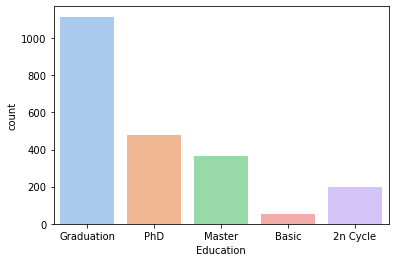

In [3]:
sns.countplot(x=df['Education'], palette='pastel')

<AxesSubplot:xlabel='Living_With', ylabel='count'>

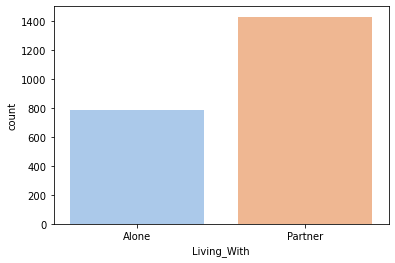

In [4]:
sns.countplot(x=df['Living_With'], palette='pastel')

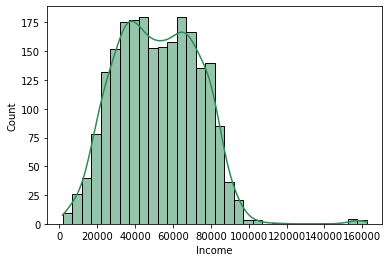

In [5]:
sns.histplot(df['Income'], kde=True, color='seagreen');

In [6]:
sunburst_df = df[['Education', 'Living_With']]

fig = px.sunburst(sunburst_df, path=['Living_With', 'Education'])
fig.show()

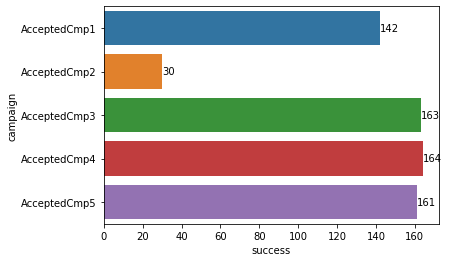

In [7]:
campaigns_df = pd.melt(df, value_vars=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'], var_name='campaign', value_name='success', ignore_index=True)
success_df = campaigns_df[campaigns_df.success == 1]

plot = sns.barplot(data=success_df, x='success', y='campaign', ci=None, estimator=np.sum)
plot.bar_label(plot.containers[0]);

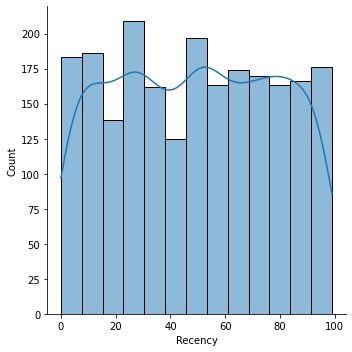

In [20]:
sns.displot(df['Recency'], kde=True);

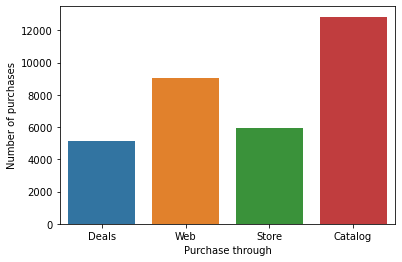

In [51]:
source_purchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index().rename(columns={0: 'sum'})

sns.barplot(x=source_purchases.index, y=source_purchases['sum'])
plt.gca().set_xticklabels(['Deals', 'Web', 'Store', 'Catalog'])
plt.xlabel('Purchase through')
plt.ylabel('Number of purchases');

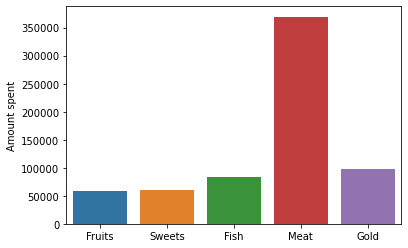

In [62]:
spendings_per_product = df[['MntFruits', 'MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntGoldProds']].sum().reset_index().rename(columns={0: 'sum'})

sns.barplot(x=spendings_per_product.index, y=spendings_per_product['sum'])
plt.gca().set_xticklabels(['Fruits', 'Sweets', 'Fish', 'Meat', 'Gold'])
plt.ylabel('Amount spent');